<a href="https://colab.research.google.com/github/Hafeezali366/Spaceship-Titanic/blob/main/main_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('future.no_silent_downcasting', True)

## 1. Data Loading

Load train and test datasets from GitHub

In [ ]:
# Github URL to our dataset
train_url = "https://raw.githubusercontent.com/Hafeezali366\
/Spaceship-Titanic/refs/heads/main/dataset/train.csv"

test_url = "https://raw.githubusercontent.com/Hafeezali366\
/Spaceship-Titanic/refs/heads/main/dataset/test.csv"


In [ ]:
# Load dataset
train_df = pd.read_csv(train_url)
test_df = pd.read_csv(test_url)

## 2. Initial Data Exploration

* Dataset shape & preview

* Data types & missing values

* Target variable distribution (Transported)

* Descriptive statistics for numerical features

In [ ]:
# Inspect the dataset shape
print(f"Train dataset shape: {train_df.shape}")
print(f"Test dataset shape: {test_df.shape}")

Train dataset shape: (8693, 14)
Test dataset shape: (4277, 13)


In [ ]:
# Preview the dataset
print("First 5 rows:\n")
display(train_df.head())

First 5 rows:



,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
# Check for data types & null values
print("Data types and missing values for training data:\n")
train_df.info()

Data types and missing values for training data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
print("Data types and missing values for testing data:\n")
test_df.info()

Data types and missing values for testing data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


*We can see that the non null values for all the columns except the first and the last column is different, suggesting missing data.*

In [ ]:
# Count missing values per column for train_df
miss_val_train = train_df.isnull().sum()

print("Missing values per column for training dataset:\n")
print(miss_val_train)


Missing values per column for training dataset:

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


*As the highest percentage of missing data from all the columns is less than 3% and it doesn't effect our EDA, we can proceed with the further EDA and handle the missing data later.*

In [ ]:
# Count missing values per column for test_df
miss_val_test = test_df.isnull().sum()

print("Missing values per column for testing dataset:\n")
print(miss_val_test)


Missing values per column for testing dataset:

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


Transported
True     0.503624
False    0.496376
Name: proportion, dtype: float64


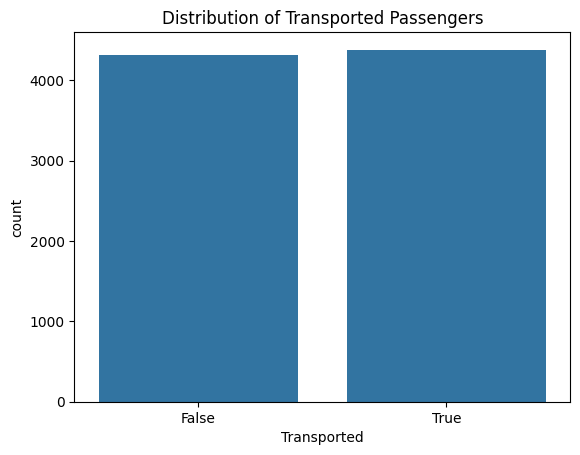

In [ ]:
# Analyze the target variable
print(train_df['Transported'].value_counts(normalize=True))
sns.countplot(data=train_df, x='Transported')
plt.title('Distribution of Transported Passengers')
plt.show()

In [ ]:
# Descriptive statistics for numerical columns
print("Descriptive Statistics for Numerical Features:\n")
display(train_df.describe())


Descriptive Statistics for Numerical Features:



,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


## 3. Exploratory Data Analysis (EDA)

* Histograms of numerical features

* Count plots of categorical features

* Categorical features vs. Transported

* Box plots of numerical features vs. Transported

* Correlation heatmap

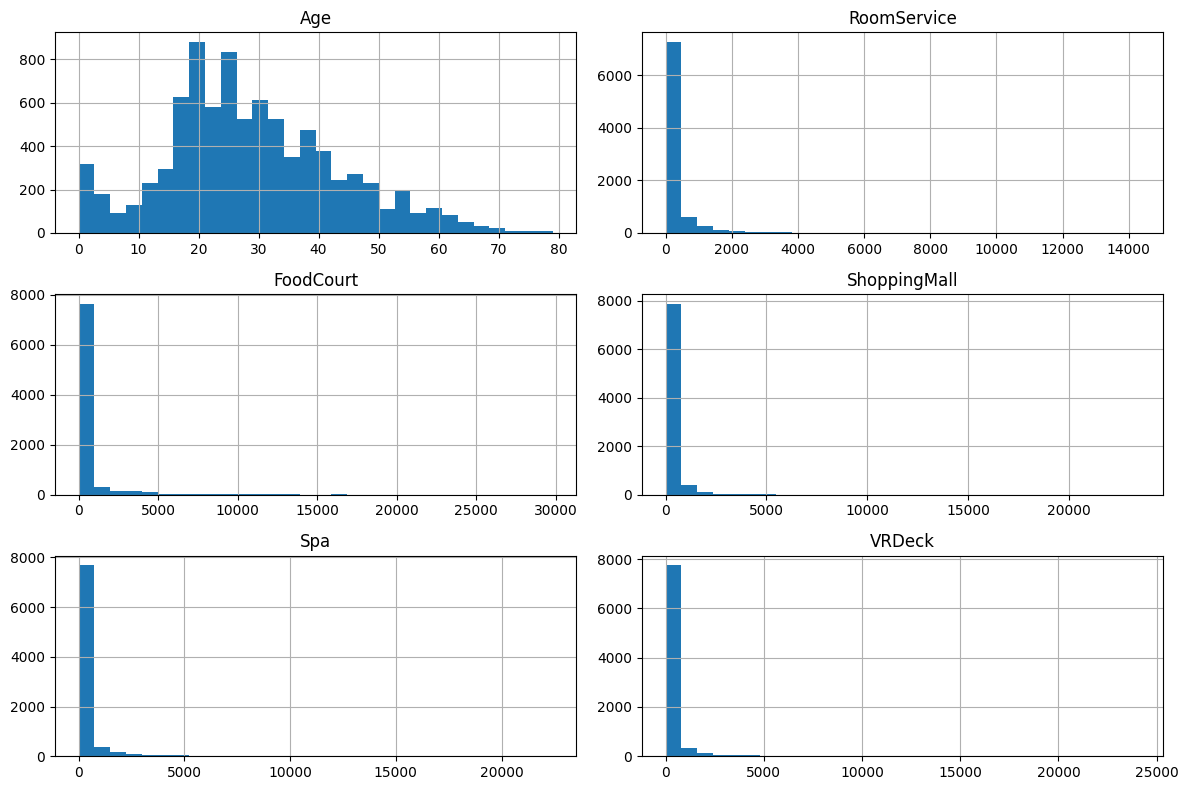

In [ ]:
# Plot histograms for numerical features
num_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
train_df[num_cols].hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show()

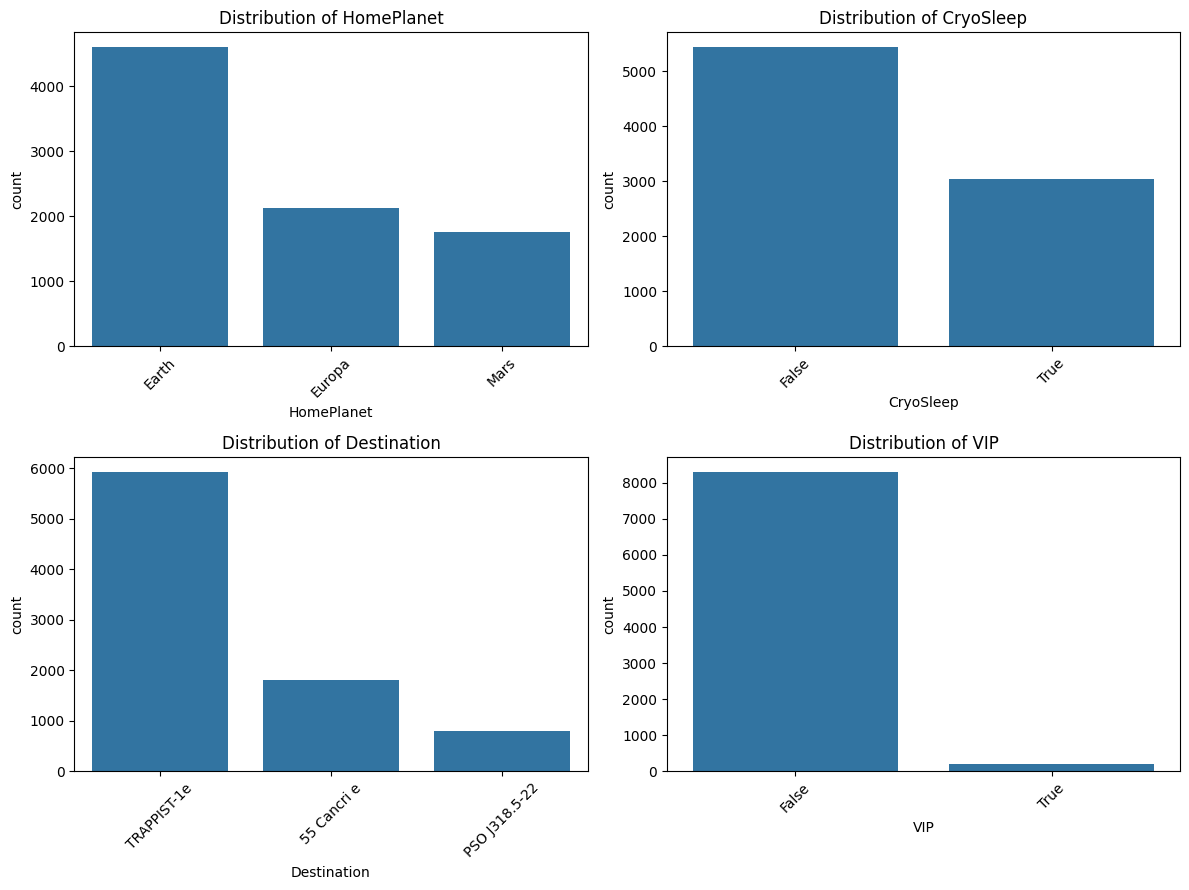

In [ ]:
# Plot count plot for categorigal features
cat_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

fig, axes = plt.subplots(2, 2, figsize=(12, 9))

for ax, col in zip(axes.flatten(), cat_cols):
    sns.countplot(data=train_df, x=col,
                  order=train_df[col].value_counts().index, ax=ax)

    ax.set_title(f'Distribution of {col}')
    plt.setp(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

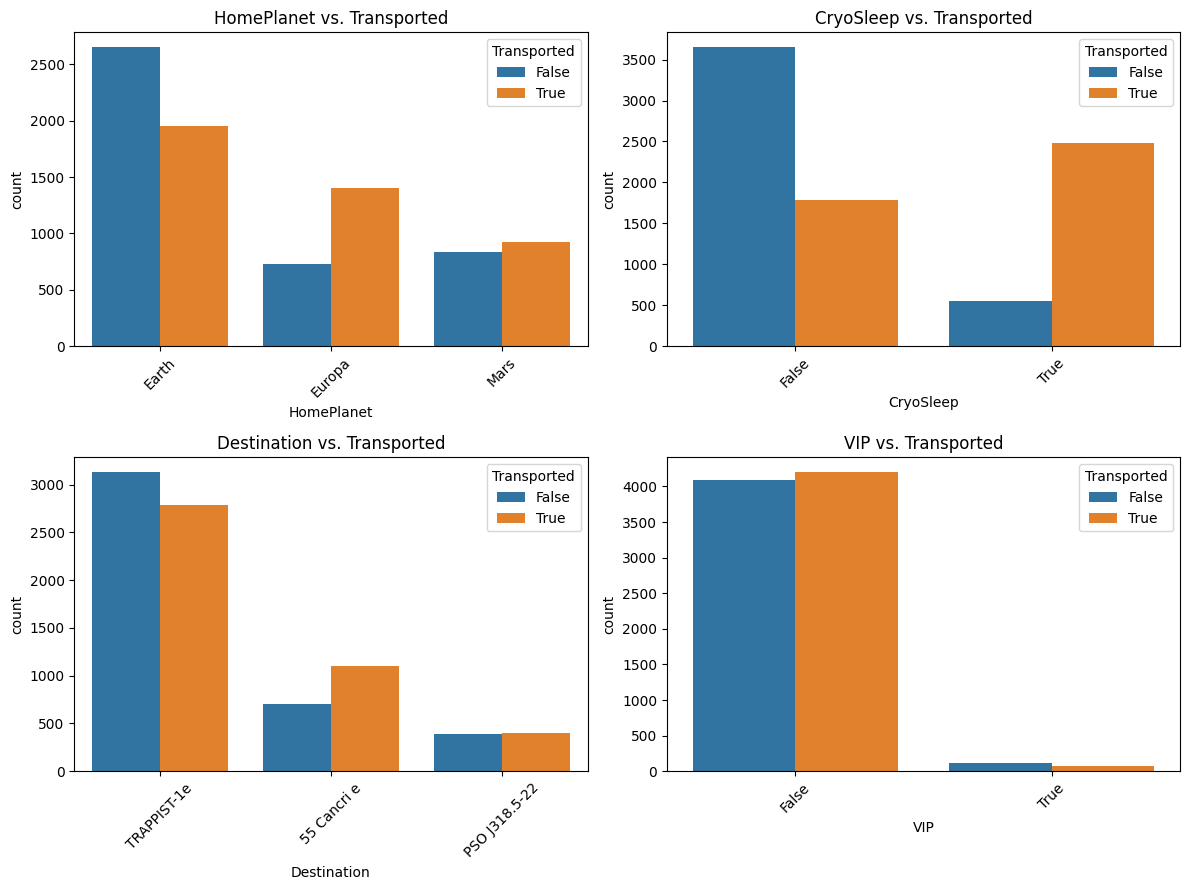

In [ ]:
# Plot count plot for categorigal features vs transported variable
fig, axes = plt.subplots(2, 2, figsize=(12, 9))

for ax, col in zip(axes.flatten(), cat_cols):
    sns.countplot(data=train_df, x=col, hue='Transported',
                  order=train_df[col].value_counts().index, ax=ax)

    ax.set_title(f'{col} vs. Transported')
    plt.setp(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

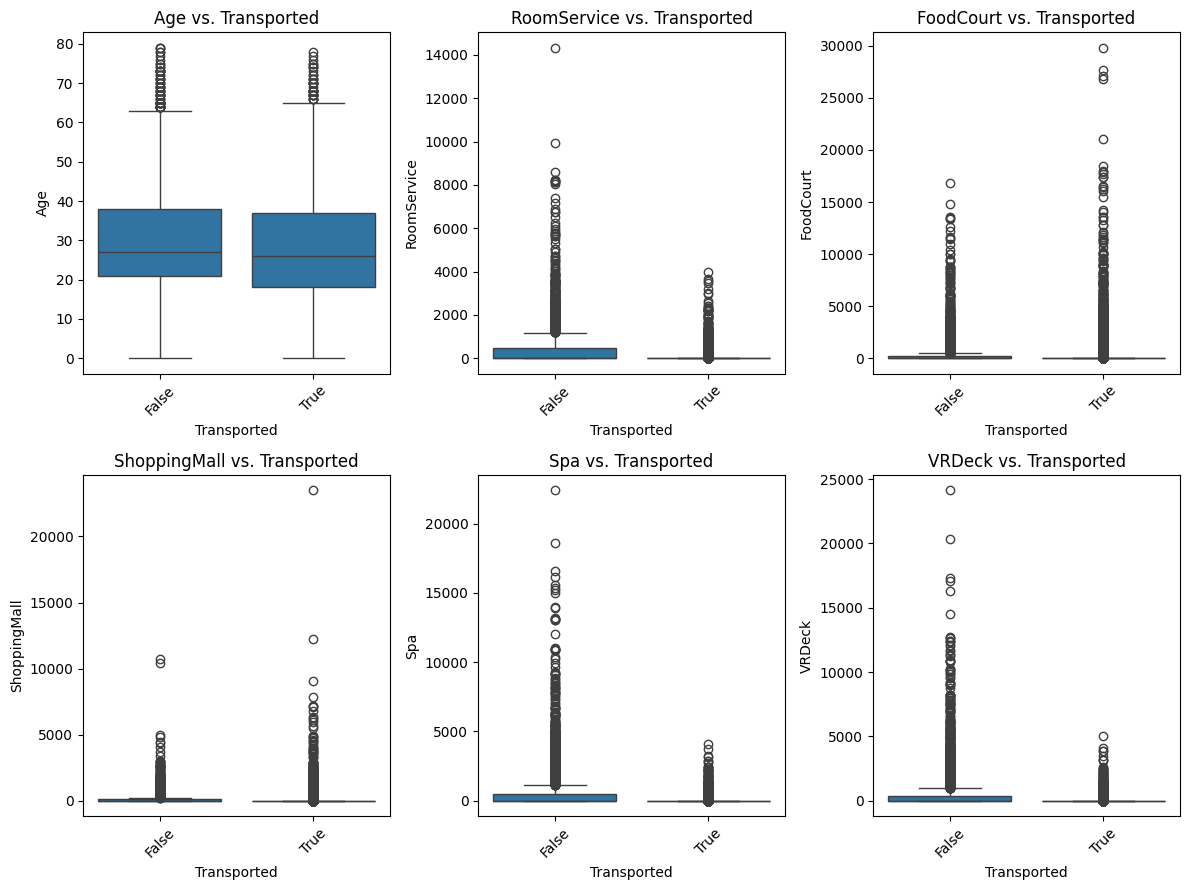

In [ ]:
# Plot box plot for numerical features vs transported variable
fig, axes = plt.subplots(2, 3, figsize=(12, 9))

for ax, col in zip(axes.flatten(), num_cols):
    sns.boxplot(data=train_df, x='Transported', y=col, ax=ax)

    ax.set_title(f'{col} vs. Transported')
    plt.setp(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

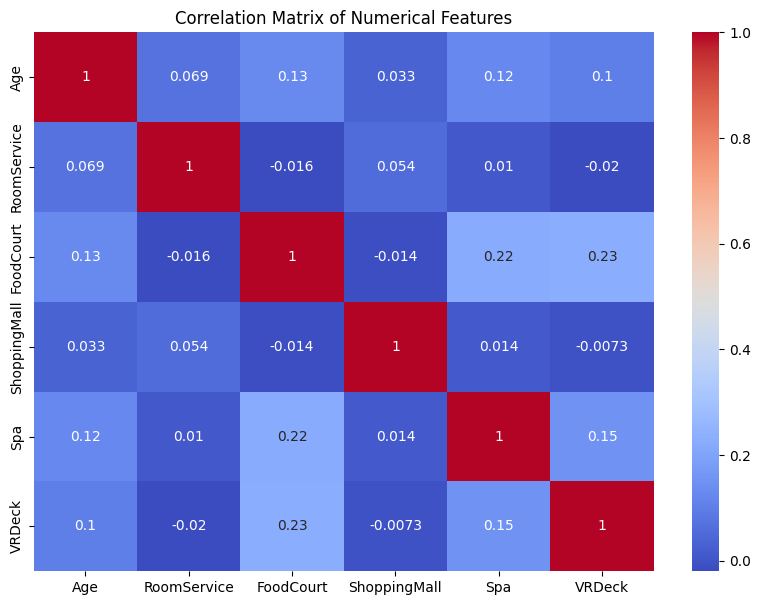

In [ ]:
# Plot the correlation matrix for numberical features
plt.figure(figsize=(10, 7))
sns.heatmap(train_df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## 4. Data Cleaning & Imputation

* Impute missing numerical values (median)

* Impute categorical values (mode)

* Special CryoSleep imputation logic

* Handle missing Cabin values

* Drop duplicates

* Drop irrelevant columns (Name)

In [ ]:
# Impute numerical columns with median
for col in num_cols:
      train_df[col] = train_df[col].fillna(train_df[col].median())
      test_df[col] = test_df[col].fillna(test_df[col].median())

In [ ]:
# Impute categorical columns with mode
for col in cat_cols:
    # Special CryoSleep Imputation: If CryoSleep is missing but
    # total spending is zero, impute CryoSleep as True
    if col == 'CryoSleep':
        train_df['CryoSleep'] = train_df.apply(lambda row: True if \
pd.isna(row['CryoSleep']) and row[['RoomService', 'FoodCourt', 'ShoppingMall',
                    'Spa', 'VRDeck']].sum() == 0 else row['CryoSleep'], axis=1)

        test_df['CryoSleep'] = test_df.apply(lambda row: True if \
pd.isna(row['CryoSleep']) and row[['RoomService', 'FoodCourt', 'ShoppingMall',
                    'Spa', 'VRDeck']].sum() == 0 else row['CryoSleep'], axis=1)

    train_df[col] = train_df[col].fillna(train_df[col].mode()[0])

    test_df[col] = test_df[col].fillna(test_df[col].mode()[0])

In [ ]:
# Impute missing values in 'Cabin' column with mode (since it's categorical)
train_df['Cabin'] = train_df['Cabin'].fillna(train_df['Cabin'].mode()[0])
test_df['Cabin'] = test_df['Cabin'].fillna(test_df['Cabin'].mode()[0])

In [ ]:
# Remove duplicate rows from the dataset to ensure data integrity
train_df.drop_duplicates(inplace=True)
test_df.drop_duplicates(inplace=True)

In [ ]:
# Remove irrelevant features which are unlikely to be predictive for the model
train_df.drop(columns=['Name'], inplace=True)
test_df.drop(columns=['Name'], inplace=True)

In [ ]:
# Verify that no missing values remain in the data after imputation
miss_val_train = train_df.isnull().sum()
miss_val_test = test_df.isnull().sum()

print("Missing values per column for training dataset:\n")
print(miss_val_train)

print("\nMissing values per column for testing dataset:\n")
print(miss_val_test)

Missing values per column for training dataset:

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

Missing values per column for testing dataset:

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64


In [ ]:
# Display first few rows of the final preprocessed data
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


## 5. Feature Engineering

* Split Cabin into Deck, CabinNum, and Side

* Create GroupId and InGroup indicator

* Generate TotalSpending and NoSpending features

In [ ]:
# Split the Cabin column into three parts: Deck, CabinNum, and Side
train_df[['Deck', 'CabinNum', 'Side']] = train_df['Cabin'].str.split('/',
                                                                  expand=True)
train_df.drop(columns=['Cabin'], inplace=True)
test_df[['Deck', 'CabinNum', 'Side']] = test_df['Cabin'].str.split('/',
                                                                  expand=True)
test_df.drop(columns=['Cabin'], inplace=True)

In [ ]:
# Create GroupId from PassengerId and check for Group
train_df['GroupId'] = train_df['PassengerId'].str.split('_').str[0]
test_df['GroupId'] = test_df['PassengerId'].str.split('_').str[0]

In [ ]:
# InGroup - Check the passengers in the same group
train_df['InGroup'] = train_df['GroupId'].duplicated(keep=False).astype(int)
train_df.drop(columns=['GroupId'], inplace=True)
test_df['InGroup'] = test_df['GroupId'].duplicated(keep=False).astype(int)
test_df.drop(columns=['GroupId'], inplace=True)

In [ ]:
# Create spending features: TotalSpending and NoSpending
train_df['TotalSpending'] = train_df[['RoomService', 'FoodCourt',
                                  'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
test_df['TotalSpending'] = test_df[['RoomService', 'FoodCourt',
                                  'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

In [ ]:
# Create binary feature for NoSpending (True if the total spending is 0)
train_df['NoSpending'] = (train_df['TotalSpending'] == 0).astype(int)
test_df['NoSpending'] = (test_df['TotalSpending'] == 0).astype(int)

In [ ]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,CabinNum,Side,InGroup,TotalSpending,NoSpending
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P,0,0.0,1
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S,0,736.0,0
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S,1,10383.0,0
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S,1,5176.0,0
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S,0,1091.0,0


## 6. Encoding & Scaling

* Label Encoding: binary categorical features

* One-Hot Encoding: multi-class categorical features

* Robust Scaling: numerical features

In [ ]:
# Label Encoding for binary features (CryoSleep, VIP, Side)
from sklearn.preprocessing import LabelEncoder
label_cols = ['CryoSleep', 'VIP', 'Side']
label_encoder = LabelEncoder()

for col in label_cols:
    train_df[col] = label_encoder.fit_transform(train_df[col])
    test_df[col] = label_encoder.transform(test_df[col])

# One-Hot Encoding for multi-class features (HomePlanet, Destination, Deck)
train_df = pd.get_dummies(train_df, columns=['HomePlanet',
                            'Destination', 'Deck'], drop_first=True, dtype=int)
test_df = pd.get_dummies(test_df, columns=['HomePlanet',
                            'Destination', 'Deck'], drop_first=True, dtype=int)

In [ ]:
# Normalizing numerical features using RobustScaler
from sklearn.preprocessing import RobustScaler

numerical_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall',
                'Spa', 'VRDeck', 'TotalSpending', 'CabinNum']
scaler = RobustScaler()

train_df[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])
test_df[numerical_cols] = scaler.transform(test_df[numerical_cols])

In [ ]:
train_df.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,...,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
0,0001_01,0,0.705882,0,0.000000,0.000000,0.000000,0.000000,0.000,False,...,0,0,1,1,0,0,0,0,0,0
1,0002_01,0,-0.176471,0,2.658537,0.147541,1.136364,10.358491,1.100,True,...,0,0,1,0,0,0,0,1,0,0
2,0003_01,0,1.823529,1,1.048780,58.622951,0.000000,126.698113,1.225,False,...,0,0,1,0,0,0,0,0,0,0
3,0003_02,0,0.352941,0,0.000000,21.032787,16.863636,62.811321,4.825,False,...,0,0,1,0,0,0,0,0,0,0
4,0004_01,0,-0.647059,0,7.390244,1.147541,6.863636,10.660377,0.050,True,...,0,0,1,0,0,0,0,1,0,0


## 7. Model Setup & Baseline Comparison

* Define target and features

* Train/test split

* Compare 5 baseline models: Logistic Regression, Random Forest, Gradient Boosting, XGBoost, and LightGBM

In [ ]:
# Importing ML libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Separate features and target
X = train_df.drop(columns=['Transported', 'PassengerId'], errors='ignore')
y = train_df['Transported'].astype(int)

# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,
                                                  random_state=42)

In [ ]:
# Clean column names for LightGBM
X_train.columns = X_train.columns.str.replace(' ', '_')
X_val.columns = X_val.columns.str.replace(' ', '_')

In [ ]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGB Classifier': XGBClassifier(),
    'LGBM Classifier': LGBMClassifier()
}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    print(f'{name} Accuracy: {acc:.4f}')

Logistic Regression Accuracy: 0.7803
Random Forest Accuracy: 0.7930
Gradient Boosting Accuracy: 0.7895
XGB Classifier Accuracy: 0.7964
[LightGBM] [Info] Number of positive: 3500, number of negative: 3454
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008718 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1893
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503307 -> initscore=0.013230
[LightGBM] [Info] Start training from score 0.013230
LGBM Classifier Accuracy: 0.8074


## 8. Hyperparameter Tuning with RandomizedSearchCV

* Define parameter grid

* Perform randomized search

* Evaluate best model on validation set

In [ ]:
# Define the model
lgbm = LGBMClassifier(random_state=42)

# Define hyperparameter space
param_dist = {
    'num_leaves': np.arange(10, 100, 5),
    'max_depth': np.arange(3, 15),
    'learning_rate': [0.005, 0.01, 0.05, 0.1],
    'n_estimators': np.arange(50, 500, 50),
    'min_child_samples': np.arange(5, 50, 5)
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist,
    n_iter=50,
    scoring='accuracy',
    cv=5,
    verbose=3,
    random_state=42,
    n_jobs=-1
)

# Fit random search
random_search.fit(X_train, y_train)

# Evaluate
best_lgbm = random_search.best_estimator_
val_preds = best_lgbm.predict(X_val)
accuracy = accuracy_score(y_val, val_preds)

# Print results
print("Best Parameters:", random_search.best_params_)
print("Validation Accuracy with Best Model:", round(accuracy, 4))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Info] Number of positive: 3500, number of negative: 3454
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000985 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1893
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503307 -> initscore=0.013230
[LightGBM] [Info] Start training from score 0.013230
Best Parameters: {'num_leaves': np.int64(20), 'n_estimators': np.int64(100), 'min_child_samples': np.int64(25), 'max_depth': np.int64(11), 'learning_rate': 0.1}
Validation Accuracy with Best Model: 0.8074


## 9. Model Evaluation

* Accuracy score & classification report

* Confusion matrix visualization

* ROC curve and AUC score

In [ ]:
# Importing evaluation libraries
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
# Define model with best parameters
best_lgbm = LGBMClassifier(
    num_leaves=20,
    n_estimators=100,
    min_child_samples=25,
    max_depth=11,
    learning_rate=0.1,
    random_state=42
)

# Train the model
best_lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 3500, number of negative: 3454
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000912 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1893
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503307 -> initscore=0.013230
[LightGBM] [Info] Start training from score 0.013230


LGBMClassifier(max_depth=11, min_child_samples=25, num_leaves=20,
               random_state=42)

In [ ]:
y_pred = best_lgbm.predict(X_val)
y_pred_proba = best_lgbm.predict_proba(X_val)[:, 1]

In [ ]:
# A. Generating and Displaying Evaluation Metrics
print(f"Accuracy Score: {accuracy_score(y_val, y_pred):.4f}\n")
print("Classification Report:")
print(classification_report(y_val, y_pred))


Accuracy Score: 0.8074

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       861
           1       0.80      0.83      0.81       878

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.81      0.81      0.81      1739



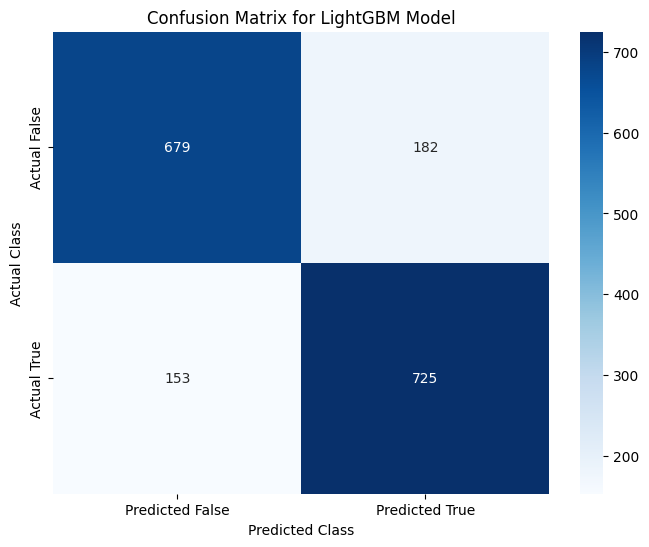

In [ ]:
# B. Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted False', 'Predicted True'],
            yticklabels=['Actual False', 'Actual True'])
plt.title('Confusion Matrix for LightGBM Model')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()


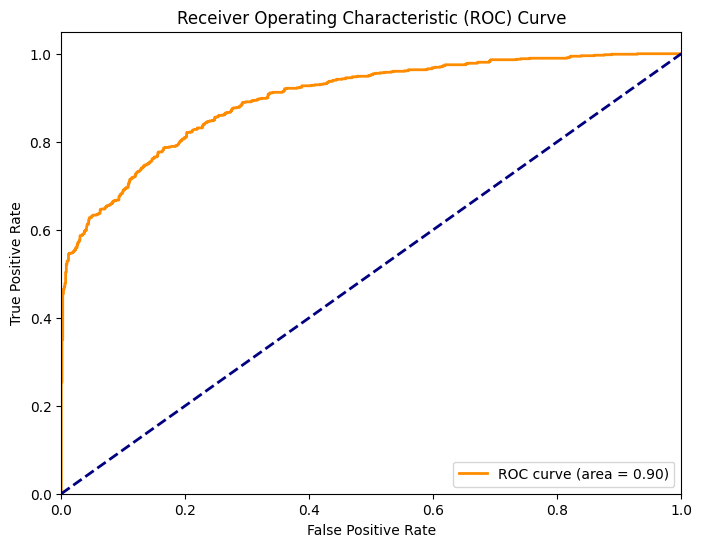


Area Under Curve (AUC): 0.8987


In [ ]:
# C. ROC Curve and AUC Score
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
auc_score = roc_auc_score(y_val, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"\nArea Under Curve (AUC): {auc_score:.4f}")


## 10. Model Explainability with SHAP

* Feature importance (LightGBM)

* SHAP summary plot

* SHAP force plot (individual explanation)

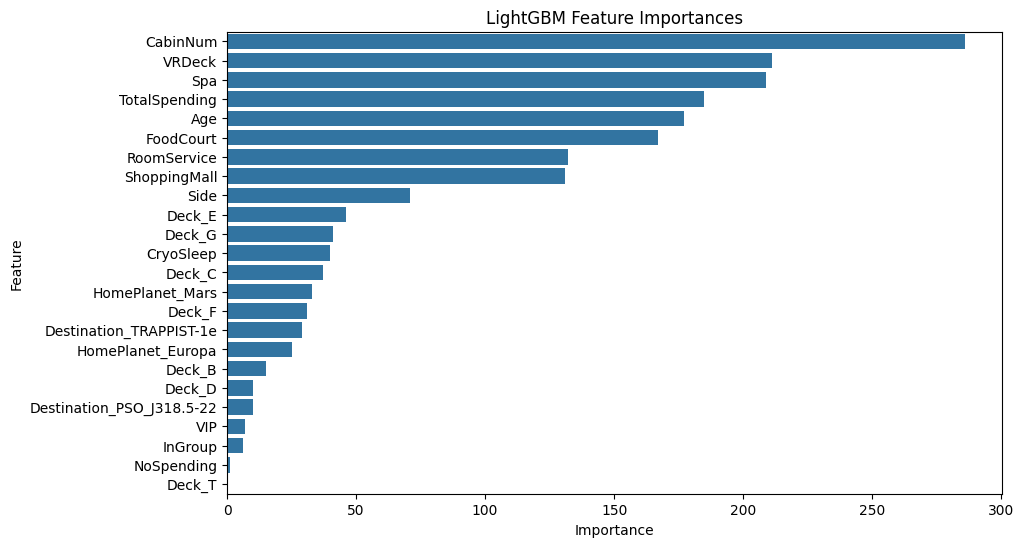


--- SHAP Analysis ---


/usr/local/lib/python3.11/dist-packages/shap/explainers/_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


In [ ]:
import shap

# Feature Importances from the LightGBM model
feature_importances = pd.DataFrame({'feature': X_train.columns,
                                'importance': best_lgbm.feature_importances_})
feature_importances = feature_importances.sort_values('importance',
                                                      ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('LightGBM Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# SHAP (SHapley Additive exPlanations) Analysis
print("\n--- SHAP Analysis ---")
# Creating a SHAP explainer object for the trained model
explainer = shap.TreeExplainer(best_lgbm)
# Calculating SHAP values for the test set
shap_values = explainer.shap_values(X_val)


SHAP Summary Plot:
The plot shows the most important features and their impact on the model's predictions.
Each point is a Shapley value for a feature and an instance. Red indicates a high feature value, blue a low one.


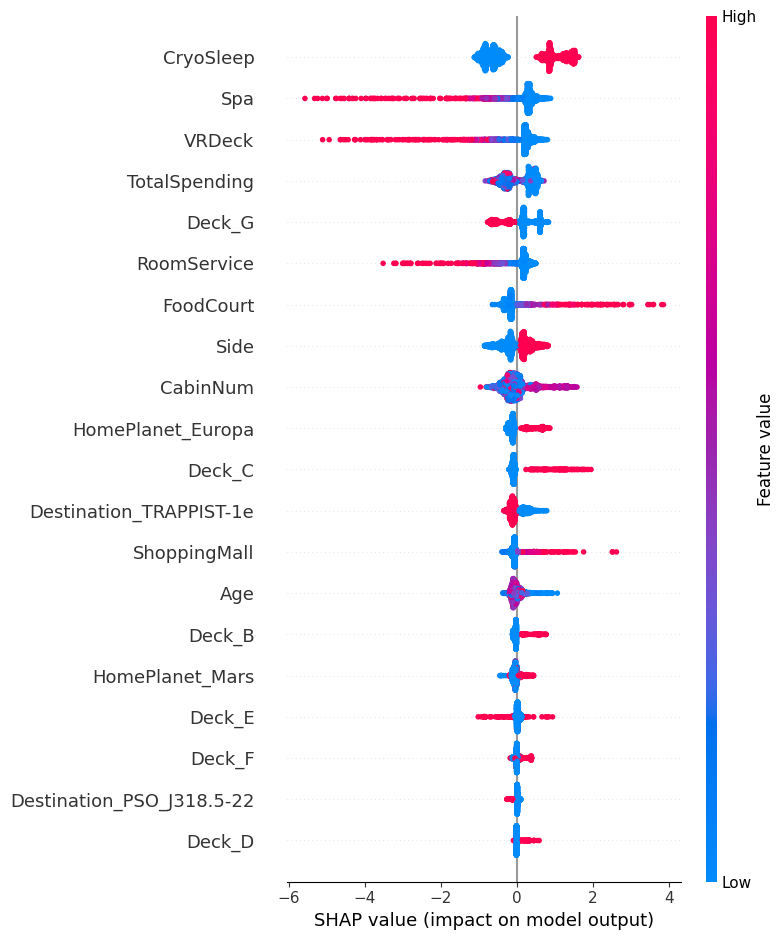


SHAP Force Plot for a Single Prediction:
Explaining the prediction for the first passenger in the test set.


In [ ]:
# Initializing JavaScript for SHAP plots in a notebook environment
shap.initjs()

# SHAP Summary Plot (Global Explanation)
print("\nSHAP Summary Plot:")
print("The plot shows the most important features and\
 their impact on the model's predictions.")
print("Each point is a Shapley value for a feature and\
 an instance. Red indicates a high feature value, blue a low one.")
shap.summary_plot(shap_values, X_val, plot_type="dot")

# SHAP Force Plot (Individual Prediction Explanation)
print("\nSHAP Force Plot for a Single Prediction:")
print("Explaining the prediction for the first passenger in the test set.")

shap.force_plot(explainer.expected_value, shap_values[0], X_val.iloc[0, :])

## 11. Prediction on Test Set & Submission

* Generate predictions

* Convert to boolean output

* Create submission file

* Save submission as CSV

In [ ]:
# Generate probabilities
test_prob = best_lgbm.predict(test_df.drop(columns=['PassengerId']))

# Convert probabilities to binary labels (0 or 1)
test_pred = (test_prob > 0.5).astype(bool)

# Create submission DataFrame
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Transported': test_pred
})

# Save to CSV
submission.to_csv("submission.csv", index=False)

print("Submission file 'submission.csv' has been saved.")


Submission file 'submission.csv' has been saved.
